In [1]:
# Trabajo final de Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from cycler import cycler


In [2]:
#Funcion lambda para la trnasformacion de los timestamps en fechas
changeToDate = lambda x: datetime.datetime.utcfromtimestamp(x).strftime("%Y-%m-%d")
changeToDatetime = lambda x: datetime.datetime.utcfromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S")


In [3]:
# Abrir archivos nombrar columnas, se elimina la ultima que no se utiliza y se agraga la moneda para diferenciar
# Cargando archivo Euros
dfEURtot = pd.read_csv("anxhkEUR.csv", names=["Fecha", "PrecioEUR", "Monto"])
dfEURtot = dfEURtot.drop("Monto", 1)
#dfEUR["Moneda"] = "EUR" 

# Duplicamos Hora para que sort obtenga el ultimo valor del dia
dfEURtot["Fecha-Hora"] = dfEURtot["Fecha"]

# Se le da formato a las fechas
dfEURtot["Fecha"]=dfEURtot["Fecha"].apply(changeToDate)
dfEURtot["Fecha-Hora"]=dfEURtot["Fecha-Hora"].apply(changeToDatetime)

# Se hace el sort y se obtiene unicamente el ultimo registro del dia
dfEUR = dfEURtot.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).last()
#dfEUR.to_csv("Euros.csv")
# Elimanacion columna que unicamente fue usada para el sort
dfEUR = dfEUR.drop("Fecha-Hora", 1)

In [4]:
# Seleccionando periodo de dataframe 365 dias
dfEUR = dfEUR[dfEUR["Fecha"] >= "2014-10-10"]
dfEUR = dfEUR.set_index("Fecha")
#dfEUR.to_csv("Euros.csv")
dfEUR.head(10)


,PrecioEUR
Fecha,
2014-10-10,285.67396
2014-10-11,285.12108
2014-10-12,291.68339
2014-10-13,298.56523
2014-10-14,323.35733
2014-10-15,304.06230
2014-10-16,292.01487
2014-10-17,298.37179
2014-10-18,302.40179


In [5]:
# Dolares
dfUSDtot = pd.read_csv("anxhkUSD.csv", names=["Fecha", "PrecioUSD", "Monto"])
dfUSDtot = dfUSDtot.drop("Monto", 1)
#dfUSD["Moneda"] = "USD" 

dfUSDtot["Fecha-Hora"] = dfUSDtot["Fecha"]

dfUSDtot["Fecha"]=dfUSDtot["Fecha"].apply(changeToDate)
dfUSDtot["Fecha-Hora"]=dfUSDtot["Fecha-Hora"].apply(changeToDatetime)

dfUSD = dfUSDtot.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).last()

dfUSD = dfUSD.drop("Fecha-Hora", 1)


In [6]:
# Seleccionando periodo de dataframe 365 dias
dfUSD = dfUSD[dfUSD["Fecha"] >= "2014-10-10"]
dfUSD = dfUSD.set_index("Fecha")
#dfUSD.to_csv("Dolares.csv")
dfUSD.head(10)

,PrecioUSD
Fecha,
2014-10-10,360.70311
2014-10-11,360.00000
2014-10-12,365.00000
2014-10-13,380.63753
2014-10-14,405.00000
2014-10-15,390.01000
2014-10-16,373.81876
2014-10-17,380.70639
2014-10-18,385.85684


In [7]:
# Libra
dfGBPtot = pd.read_csv("anxhkGBP.csv", names=["Fecha", "PrecioGBP", "Monto"])
dfGBPtot = dfGBPtot.drop("Monto", 1)
#dfGBP["Moneda"] = "GBP"

dfGBPtot["Fecha-Hora"] = dfGBPtot["Fecha"]

dfGBPtot["Fecha"]=dfGBPtot["Fecha"].apply(changeToDate)
dfGBPtot["Fecha-Hora"]=dfGBPtot["Fecha-Hora"].apply(changeToDatetime)

dfGBP = dfGBPtot.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).last()
dfGBP = dfGBP.drop("Fecha-Hora", 1)

In [8]:
# Seleccionando periodo de dataframe 365 dias
dfGBP = dfGBP[dfGBP["Fecha"] >= "2014-10-10"]
dfGBP = dfGBP.set_index("Fecha")
#dfUSD.to_csv("Libras.csv")
dfGBP.head(10)

,PrecioGBP
Fecha,
2014-10-10,224.37357
2014-10-11,223.94484
2014-10-12,229.20585
2014-10-13,236.71961
2014-10-14,257.33528
2014-10-15,243.78783
2014-10-16,232.70891
2014-10-17,236.56601
2014-10-18,239.77762


In [9]:
# No se efectuo Merge de Archivos. se adicionaron columnas al DataFrame
#dfResult = dfEURdep.merge(dfUSDdep,how="outer")
#dfResult = dfResult.merge(dfGBPdep,how="outer")
dfFIN = dfEUR
dfFIN["PrecioUSD"] = dfUSD["PrecioUSD"]
dfFIN["PrecioGBP"] = dfGBP["PrecioGBP"]
#dfFIN.to_csv("final.csv")
dfFIN.head(10)

,PrecioEUR,PrecioUSD,PrecioGBP
Fecha,,,
2014-10-10,285.67396,360.70311,224.37357
2014-10-11,285.12108,360.00000,223.94484
2014-10-12,291.68339,365.00000,229.20585
2014-10-13,298.56523,380.63753,236.71961
2014-10-14,323.35733,405.00000,257.33528
2014-10-15,304.06230,390.01000,243.78783
2014-10-16,292.01487,373.81876,232.70891
2014-10-17,298.37179,380.70639,236.56601
2014-10-18,302.40179,385.85684,239.77762


In [10]:
# Procesamiento 
# calculo de las fechas con mayor y menor precio de cotizacion.
# Maximo
EURsort = dfFIN.sort_values(["PrecioEUR"], ascending=False)
EURmax = EURsort.head(1)
EURmin = EURsort.tail(1)
USDsort = dfFIN.sort_values(["PrecioUSD"], ascending=False)
USDmax = USDsort.head(1)
USDmin = USDsort.tail(1)
GBPsort = dfFIN.sort_values(["PrecioGBP"], ascending=False)
GBPmax = GBPsort.head(1)
GBPmin = GBPsort.tail(1)

print "Maximo EUROS"
print EURmax["PrecioEUR"]
print "\nMaximo DOLARES"
print USDmax["PrecioUSD"]
print "\nMaximo LIBRAS"
print GBPmax["PrecioGBP"]

Maximo EUROS
Fecha
2014-11-12    330.18322
Name: PrecioEUR, dtype: float64

Maximo DOLARES
Fecha
2014-11-13    415.24901
Name: PrecioUSD, dtype: float64

Maximo LIBRAS
Fecha
2014-11-13    264.31848
Name: PrecioGBP, dtype: float64


In [11]:
# Minimo
print "Minimo EUROS"
print EURmin["PrecioEUR"]
print "\nMinimo DOLARES"
print USDmin["PrecioUSD"]
print "\nMinimo LIBRAS"
print GBPmin["PrecioGBP"]


Minimo EUROS
Fecha
2015-01-14    154.42659
Name: PrecioEUR, dtype: float64

Minimo DOLARES
Fecha
2015-01-14    182.08234
Name: PrecioUSD, dtype: float64

Minimo LIBRAS
Fecha
2015-01-14    119.52158
Name: PrecioGBP, dtype: float64


In [12]:
Data_RM = dfFIN.rolling(window=30).mean()
Data_RM= Data_RM.dropna()

In [13]:
Data_RM.head(10)

,PrecioEUR,PrecioUSD,PrecioGBP
Fecha,,,
2014-11-08,284.133022,358.830249,224.049837
2014-11-09,284.096970,358.630628,224.015998
2014-11-10,284.382891,358.797295,224.224346
2014-11-11,284.522190,358.931303,224.311103
2014-11-12,285.576123,360.017044,225.098216
2014-11-13,285.764212,360.358678,225.330990
2014-11-14,286.441107,360.901065,225.845662
2014-11-15,286.993843,361.323380,226.310964
2014-11-16,287.536615,361.767071,226.807501


In [14]:
dfFIN.head(10)

,PrecioEUR,PrecioUSD,PrecioGBP
Fecha,,,
2014-10-10,285.67396,360.70311,224.37357
2014-10-11,285.12108,360.00000,223.94484
2014-10-12,291.68339,365.00000,229.20585
2014-10-13,298.56523,380.63753,236.71961
2014-10-14,323.35733,405.00000,257.33528
2014-10-15,304.06230,390.01000,243.78783
2014-10-16,292.01487,373.81876,232.70891
2014-10-17,298.37179,380.70639,236.56601
2014-10-18,302.40179,385.85684,239.77762


In [15]:
#ax = dfFIN[["PrecioEUR", "PrecioUSD","PrecioGBP"]].plot(kind="line")
#plt.show()

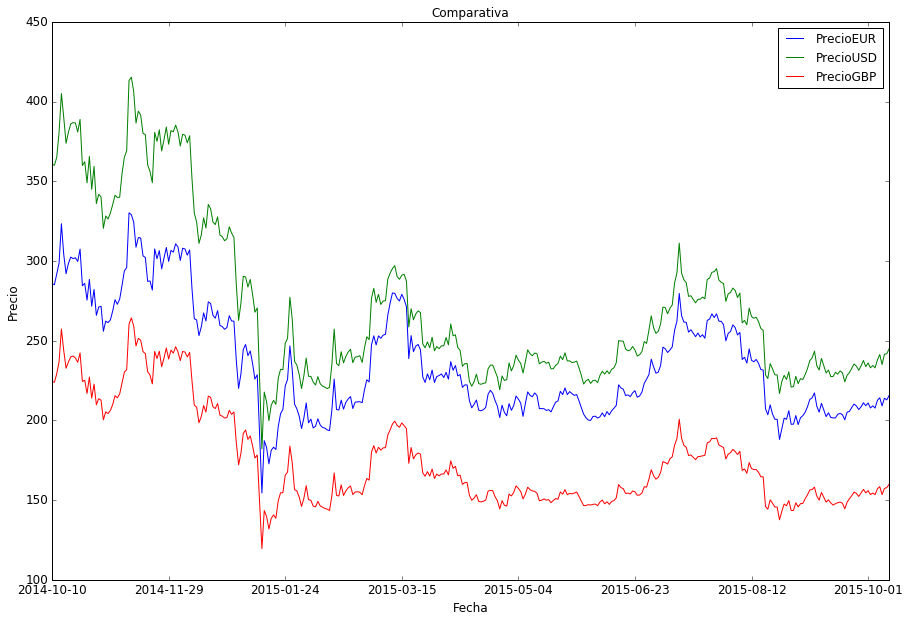

In [16]:
%matplotlib inline
#dfFIN.plot()

ax = dfFIN[["PrecioEUR","PrecioUSD","PrecioGBP"]].plot(kind="line", title ="Comparativa",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
ax.set_ylabel("Precio",fontsize=12)
plt.show()

In [17]:
# OBtengo Spread de los diferentes Grupos, Valor Maximo y Minimo Euros
dfEURtot = dfEURtot[dfEURtot["Fecha"] >= "2014-10-10"]
dfEURmax = dfEURtot.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).max()
dfEURmin = (dfEURtot.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).min())


In [18]:
dfEURSP = dfFIN
dfEURmax = dfEURmax.set_index("Fecha")
dfEURmin = dfEURmin.set_index("Fecha")

In [19]:
dfEURSP["PrecioMax"] = dfEURmax["PrecioEUR"]
dfEURSP["PrecioMin"] = dfEURmin["PrecioEUR"]
dfFIN["SpreadEUR"]= dfEURSP["PrecioMax"] - dfEURSP["PrecioMin"]
dfFIN.head(10)

,PrecioEUR,PrecioUSD,PrecioGBP,PrecioMax,PrecioMin,SpreadEUR
Fecha,,,,,,
2014-10-10,285.67396,360.70311,224.37357,298.64518,242.04680,56.59838
2014-10-11,285.12108,360.00000,223.94484,288.00421,254.84590,33.15831
2014-10-12,291.68339,365.00000,229.20585,292.13345,268.78148,23.35197
2014-10-13,298.56523,380.63753,236.71961,300.78186,269.51954,31.26232
2014-10-14,323.35733,405.00000,257.33528,323.62394,277.19377,46.43017
2014-10-15,304.06230,390.01000,243.78783,317.84215,304.06230,13.77985
2014-10-16,292.01487,373.81876,232.70891,313.82118,292.01487,21.80631
2014-10-17,298.37179,380.70639,236.56601,304.99394,239.96469,65.02925
2014-10-18,302.40179,385.85684,239.77762,302.40483,271.71166,30.69317


In [20]:
# OBtengo Spread de los diferentes Grupos, Valor Maximo y Minimo Dolares
dfUSDtot = dfUSDtot[dfUSDtot["Fecha"] >= "2014-10-10"]
dfUSDmax = dfUSDtot.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).max()
dfUSDmin = (dfUSDtot.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).min())

In [21]:
dfUSDSP = dfFIN
dfUSDmax = dfUSDmax.set_index("Fecha")
dfUSDmin = dfUSDmin.set_index("Fecha")

In [22]:
dfUSDSP["PrecioMax"] = dfUSDmax["PrecioUSD"]
dfUSDSP["PrecioMin"] = dfUSDmin["PrecioUSD"]
dfFIN["SpreadUSD"]= dfUSDSP["PrecioMax"] - dfUSDSP["PrecioMin"]
dfFIN.head(10)

,PrecioEUR,PrecioUSD,PrecioGBP,PrecioMax,PrecioMin,SpreadEUR,SpreadUSD
Fecha,,,,,,,
2014-10-10,285.67396,360.70311,224.37357,379.26183,307.43713,56.59838,71.82470
2014-10-11,285.12108,360.00000,223.94484,363.64030,321.77391,33.15831,41.86639
2014-10-12,291.68339,365.00000,229.20585,368.82600,339.36928,23.35197,29.45672
2014-10-13,298.56523,380.63753,236.71961,383.10662,341.48084,31.26232,41.62578
2014-10-14,323.35733,405.00000,257.33528,409.26840,352.37535,46.43017,56.89305
2014-10-15,304.06230,390.01000,243.78783,401.57191,383.47473,13.77985,18.09718
2014-10-16,292.01487,373.81876,232.70891,402.48388,373.81876,21.80631,28.66512
2014-10-17,298.37179,380.70639,236.56601,390.35828,307.38811,65.02925,82.97017
2014-10-18,302.40179,385.85684,239.77762,385.86071,346.69703,30.69317,39.16368


In [23]:
# OBtengo Spread de los diferentes Grupos, Valor Maximo y Minimo Libras
dfGBPtot = dfGBPtot[dfGBPtot["Fecha"] >= "2014-10-10"]
dfGBPmax = dfGBPtot.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).max()
dfGBPmin = (dfGBPtot.sort_values(["Fecha","Fecha-Hora"], ascending=True).groupby("Fecha", as_index=False).min())

In [24]:
dfGBPSP = dfFIN
dfGBPmax = dfGBPmax.set_index("Fecha")
dfGBPmin = dfGBPmin.set_index("Fecha")

In [25]:
dfGBPSP["PrecioMax"] = dfGBPmax["PrecioGBP"]
dfGBPSP["PrecioMin"] = dfGBPmin["PrecioGBP"]
dfFIN["SpreadGBP"]= dfGBPSP["PrecioMax"] - dfGBPSP["PrecioMin"]
dfFIN.head(10)

,PrecioEUR,PrecioUSD,PrecioGBP,PrecioMax,PrecioMin,SpreadEUR,SpreadUSD,SpreadGBP
Fecha,,,,,,,,
2014-10-10,285.67396,360.70311,224.37357,235.22350,190.66082,56.59838,71.82470,44.56268
2014-10-11,285.12108,360.00000,223.94484,226.20936,200.16558,33.15831,41.86639,26.04378
2014-10-12,291.68339,365.00000,229.20585,229.54402,211.11110,23.35197,29.45672,18.43292
2014-10-13,298.56523,380.63753,236.71961,238.25515,211.95716,31.26232,41.62578,26.29799
2014-10-14,323.35733,405.00000,257.33528,257.33528,219.63221,46.43017,56.89305,37.70307
2014-10-15,304.06230,390.01000,243.78783,252.78952,241.04264,13.77985,18.09718,11.74688
2014-10-16,292.01487,373.81876,232.70891,251.60577,232.70891,21.80631,28.66512,18.89686
2014-10-17,298.37179,380.70639,236.56601,242.77202,191.16067,65.02925,82.97017,51.61135
2014-10-18,302.40179,385.85684,239.77762,239.78003,216.83167,30.69317,39.16368,22.94836


In [26]:
# Se agregaron 2 columnas a DFFIN, se les da DROP
dfFIN = dfFIN.drop("PrecioMax", 1)
dfFIN = dfFIN.drop("PrecioMin", 1)
dfFIN.head(10)

,PrecioEUR,PrecioUSD,PrecioGBP,SpreadEUR,SpreadUSD,SpreadGBP
Fecha,,,,,,
2014-10-10,285.67396,360.70311,224.37357,56.59838,71.82470,44.56268
2014-10-11,285.12108,360.00000,223.94484,33.15831,41.86639,26.04378
2014-10-12,291.68339,365.00000,229.20585,23.35197,29.45672,18.43292
2014-10-13,298.56523,380.63753,236.71961,31.26232,41.62578,26.29799
2014-10-14,323.35733,405.00000,257.33528,46.43017,56.89305,37.70307
2014-10-15,304.06230,390.01000,243.78783,13.77985,18.09718,11.74688
2014-10-16,292.01487,373.81876,232.70891,21.80631,28.66512,18.89686
2014-10-17,298.37179,380.70639,236.56601,65.02925,82.97017,51.61135
2014-10-18,302.40179,385.85684,239.77762,30.69317,39.16368,22.94836


In [27]:
# Obtiene valor maximo Spread Euros
FechaE = dfFIN["SpreadEUR"].idxmax()
ValorE = dfFIN.loc[dfFIN["SpreadEUR"].idxmax()]
ValorE = ValorE["SpreadEUR"]


In [28]:
# Obtiene valor maximo Spread Dolares
FechaU = dfFIN["SpreadUSD"].idxmax()
ValorU = dfFIN.loc[dfFIN["SpreadUSD"].idxmax()]
ValorU = ValorU["SpreadUSD"]


In [29]:
# Obtiene valor maximo Spread GBP
FechaG = dfFIN["SpreadGBP"].idxmax()
ValorG = dfFIN.loc[dfFIN["SpreadGBP"].idxmax()]
ValorG = ValorG["SpreadGBP"]


In [30]:
# Imprime los valores
print ("Maximo Spread EUROS: Fecha: ", FechaE, " Valor ", ValorE)
print ("Maximo Spread USD: Fecha: ", FechaU, " Valor ", ValorU)
print ("Maximo Spread LIBRAS: Fecha: ", FechaG, " Valor ", ValorG)

('Maximo Spread EUROS: Fecha: ', '2015-01-14', ' Valor ', 71.982730000000004)
('Maximo Spread USD: Fecha: ', '2015-01-14', ' Valor ', 85.044040000000024)
('Maximo Spread LIBRAS: Fecha: ', '2015-01-14', ' Valor ', 56.248030000000014)


In [31]:
# Otra forma calculo de las fechas con mayor Spread.
# Maximo
EURspr = dfFIN.sort_values(["SpreadEUR"], ascending=False)
EURmaxspr = EURspr.head(1)
USDspr = dfFIN.sort_values(["SpreadUSD"], ascending=False)
USDmaxspr = USDspr.head(1)
GBPspr = dfFIN.sort_values(["SpreadGBP"], ascending=False)
GBPmaxspr = GBPspr.head(1)


print ("Maximo Spread EUROS", EURmaxspr["SpreadEUR"])
print ("Maximo Spread DOLARES", USDmaxspr["SpreadUSD"])
print ("Maximo spread LIBRAS", GBPmaxspr["SpreadGBP"])

('Maximo Spread EUROS', Fecha
2015-01-14    71.98273
Name: SpreadEUR, dtype: float64)
('Maximo Spread DOLARES', Fecha
2015-01-14    85.04404
Name: SpreadUSD, dtype: float64)
('Maximo spread LIBRAS', Fecha
2015-01-14    56.24803
Name: SpreadGBP, dtype: float64)


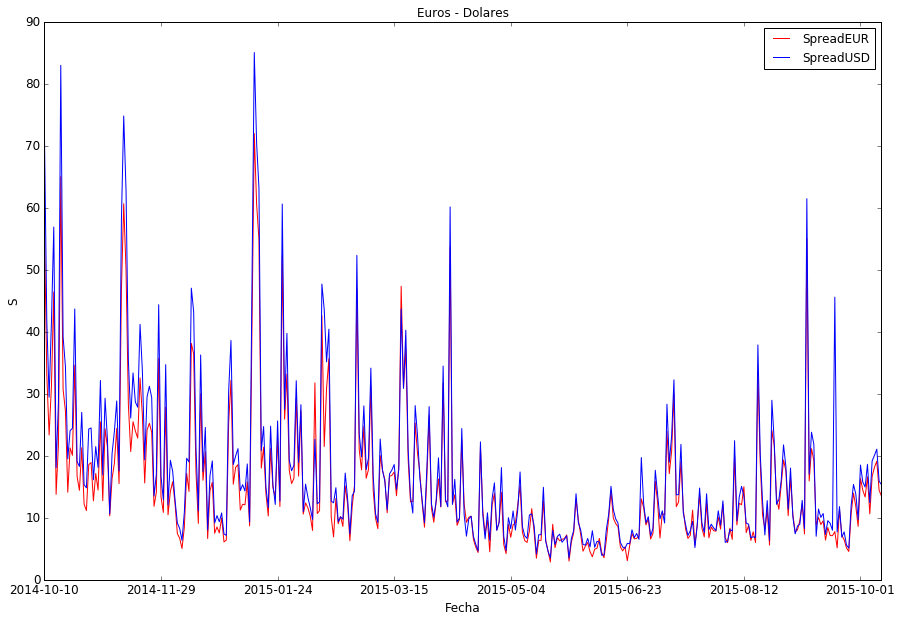

In [32]:
# Graficar los Spread, comparativos
ax = dfFIN[['SpreadEUR','SpreadUSD']].plot(kind='line', title ="Euros - Dolares", color=["red","blue"], figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
ax.set_ylabel("S",fontsize=12)
plt.show()

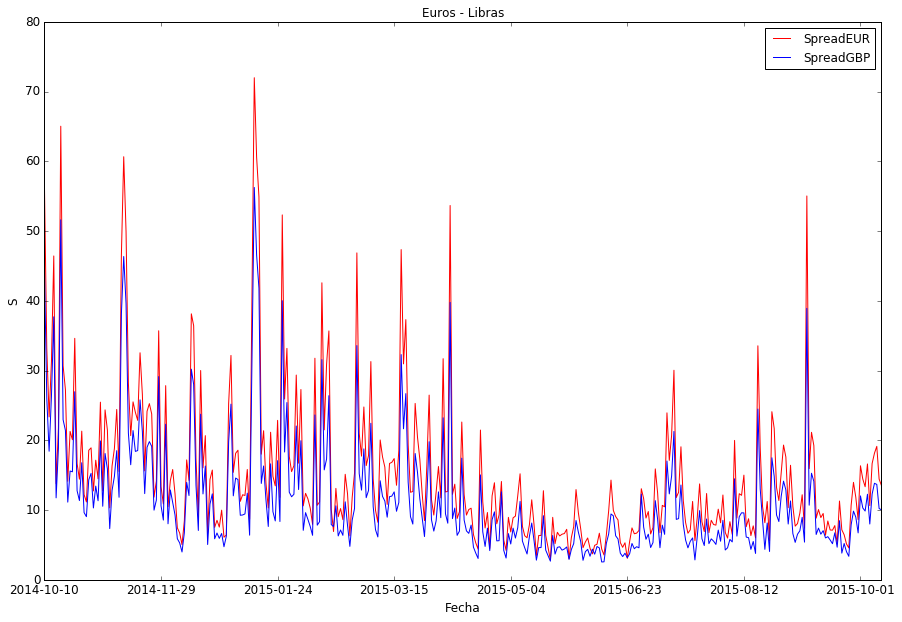

In [33]:
# Graficar los Spread, comparativos
ax = dfFIN[['SpreadEUR','SpreadGBP']].plot(kind='line', title ="Euros - Libras",color=["red","blue"],figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
ax.set_ylabel("S",fontsize=12)
plt.show()

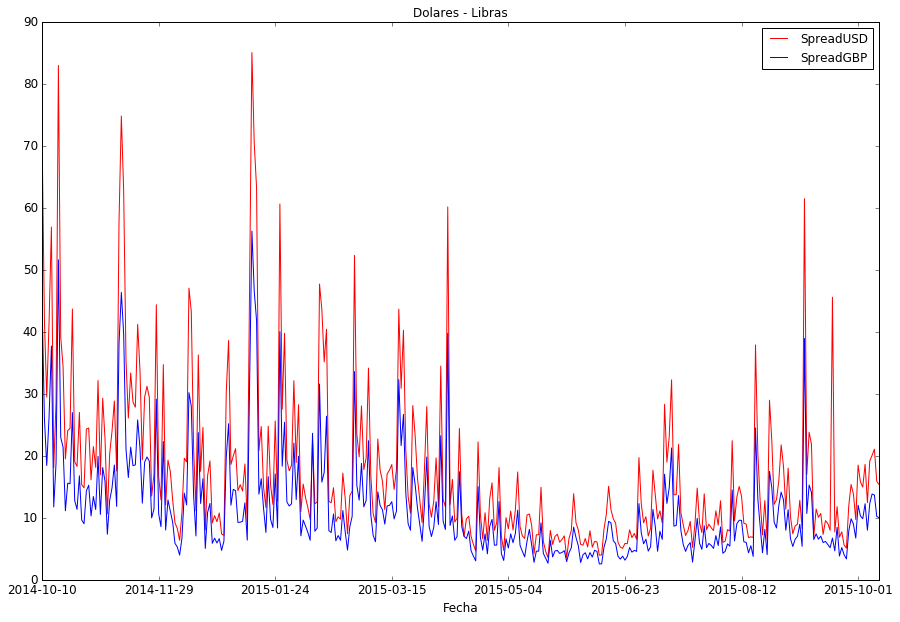

In [34]:
# Graficar los Spread, comparativos
ax = dfFIN[['SpreadUSD','SpreadGBP']].plot(kind='line', title ="Dolares - Libras", color=["red","blue"], figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Fecha",fontsize=12)
plt.show()
                                  